In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

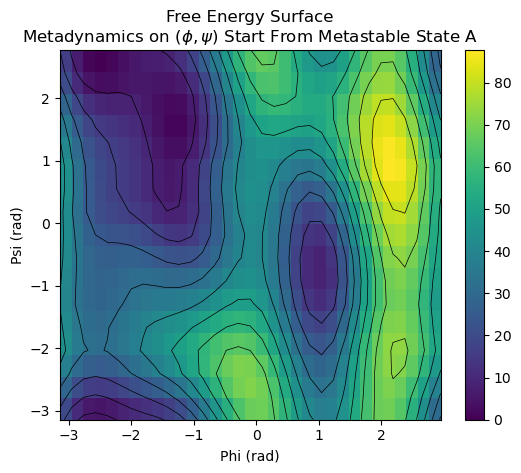

In [14]:
# plot the free energy surface for the last fes file

fes_last = np.loadtxt('../Inputs/2d metadynamics/fes_100.dat', comments='#')
fes_last_e = fes_last[:, 2].reshape((17, 33))
fes_last_phi = fes_last[:, 0].reshape((17, 33))[0]
phi_min = fes_last_phi.min()
phi_max = fes_last_phi.max()
fes_last_psi = fes_last[:, 1].reshape((17, 33))[:, 0]
psi_min = fes_last_psi.min()
psi_max = fes_last_psi.max()

fig, ax = plt.subplots()
im = ax.imshow(fes_last_e, cmap='viridis', origin='lower', extent=[phi_min, phi_max, psi_min, psi_max])
contour = ax.contour(fes_last_phi, fes_last_psi, fes_last_e, extent=[phi_min, phi_max, psi_min, psi_max], colors='black', linewidths=0.5, levels=10)

ax.set_xlabel('Phi (rad)')
ax.set_ylabel('Psi (rad)')
ax.set_title('Free Energy Surface\nMetadynamics on $(\phi, \psi)$ Start From Metastable State A')
fig.colorbar(im, ax=ax)
plt.savefig('../Figures/fes_A_metad_phipsi_last.pdf', bbox_inches="tight")

plt.show()

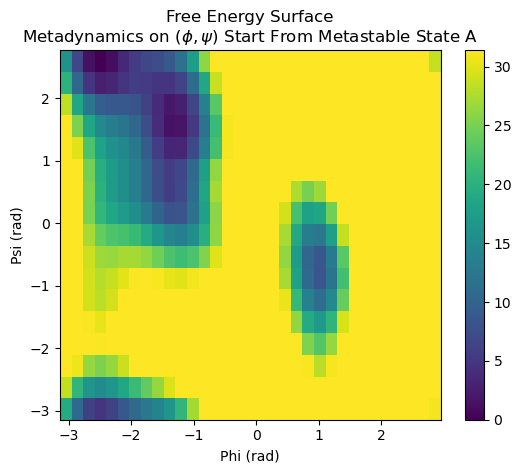

In [17]:
from matplotlib import animation

# plot the free energy surface in animation
fig, ax = plt.subplots()
fes_0 = np.loadtxt('../Inputs/2d metadynamics/fes_'+str(0)+'.dat', comments='#')
fes_0_e = fes_0[:, 2].reshape((17,33))
im = ax.imshow(fes_0_e, origin='lower', extent=[phi_min, phi_max, psi_min, psi_max])

def init():
    im.set_array(fes_0_e)
    return [im]

def animate(i):
    fes = np.loadtxt('../Inputs/2d metadynamics/fes_'+str(i)+'.dat', comments='#')
    fes_e = fes[:, 2].reshape((17,33))
    im.set_array(fes_e)
    return [im]
ax.set_xlabel('Phi (rad)')
ax.set_ylabel('Psi (rad)')
ax.set_title('Free Energy Surface\nMetadynamics on $(\phi, \psi)$ Start From Metastable State A')
fig.colorbar(im, ax=ax)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=101, interval=500, blit=True)

anim.save('../Figures/fes_A_metad_phipsi_anim.mp4', fps=30, extra_args=['-vcodec', 'libx264'])


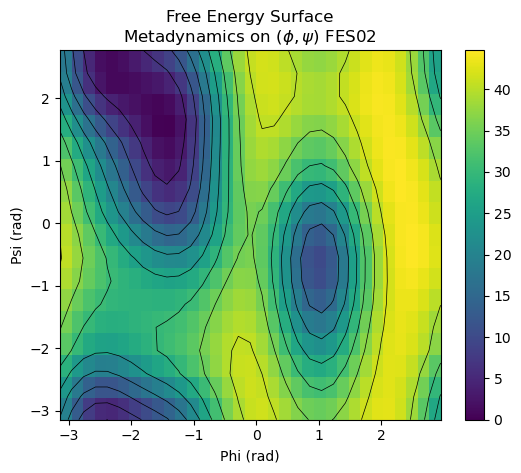

In [19]:

#From the animation, the metastable point is there from the start and throughout

fes_last = np.loadtxt('../Inputs/2d metadynamics/fes_2.dat', comments='#')
fes_last_e = fes_last[:, 2].reshape((17, 33))
fes_last_phi = fes_last[:, 0].reshape((17, 33))[0]
phi_min = fes_last_phi.min()
phi_max = fes_last_phi.max()
fes_last_psi = fes_last[:, 1].reshape((17, 33))[:, 0]
psi_min = fes_last_psi.min()
psi_max = fes_last_psi.max()

fig, ax = plt.subplots()
im = ax.imshow(fes_last_e, cmap='viridis', origin='lower', extent=[phi_min, phi_max, psi_min, psi_max])
contour = ax.contour(fes_last_phi, fes_last_psi, fes_last_e, extent=[phi_min, phi_max, psi_min, psi_max], colors='black', linewidths=0.5, levels=10)

ax.set_xlabel('Phi (rad)')
ax.set_ylabel('Psi (rad)')
ax.set_title('Free Energy Surface\nMetadynamics on $(\phi, \psi)$ FES02')
fig.colorbar(im, ax=ax)
plt.savefig('../Figures/fes2.pdf', bbox_inches="tight")

plt.show()